In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

import sys
sys.path.append("../../../../")

from src.difsched.agents.DiffusionQL.DQL_Q_esmb import DQL_Q_esmb as Agent

from toy_mdp_helper import generate_dataset, extract_deterministic_policy
from toy_mdp_helper import visualize_policy_heatmap_continuous

In [2]:
hyperparams = {
    'N_diffusion_steps':30,
    'schedule_type': "vp",
    'abs_action_max': 1.0,
    'gamma': 0.99,
    'lr': 5e-3,
    'decay_lr': False,
    'weight_decay': 0.001,
    'num_critics': 2,
    'lcb_coef': 0.0,
    'q_sample_eta': 1.0,
    'weight_entropy_loss': 0.0,
    'weight_q_loss': 1.0,
    'approximate_action': True,
    'ema_tau': 0.005,
    'ema_period': 20,
    'ema_begin_update': 1000,
    'layer_norm': False,
    'device': 'cuda',
}

N_s = 10
N_a = 10
LEN_dataset = 5000

rb_capacity = LEN_dataset
dataset, policy_mdp, P, R = generate_dataset(LEN_dataset, N_s, N_a, seed=995)


print(f"Expert's Reward:{np.mean(dataset['rewards'])}")

eta = 0.01
sample_method = "EAS" 

agent = Agent(state_dim=1, action_dim=1, **hyperparams)
agent.load_model("Results", "best")
  
_, frequency_DQ = extract_deterministic_policy(agent, N_s, N_a, sample_method=sample_method, N_sample=50, N_sampling=1000, eta=eta)
#reward_DQ, _ = evaluate_diffusionQ(agent, R, P, N_s, N_a, N_iter=1000, sample_method=sample_method, N_sample=50, eta=eta)
#print(f"Reward: {reward_DQ}")


Value Iteration: 100%|██████████| 1000/1000 [00:00<00:00, 1007.96it/s, V=-87.638921]


Expert's Reward:0.874268878606705


c:\Users\Ye\Documents\YuYeh_Documents\L2S\Projects\Diffusion-offRL\diffusion_resource_schduling_intra_slice\src\notebooks\05_examples\mdp_example\toy_mdp_helper.py:487: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


Plot saved to: continuous_policy.png


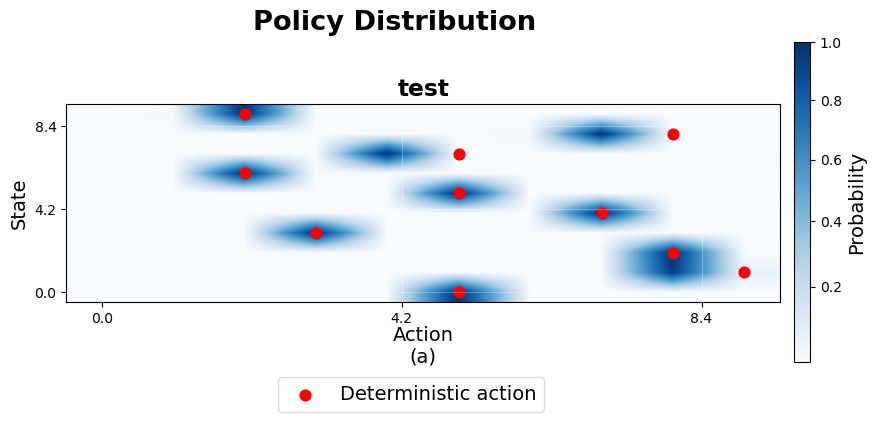

In [6]:
visualize_policy_heatmap_continuous(
    frequency_heatmaps=[frequency_DQ],
    policy_deterministic_list=[policy_mdp],
    main_title="Policy Distribution",
    titles = ["test"],
    save_path="continuous_policy.png",
    figsize=(8, 4),
    font_scale=1.4,
    interpolation="bilinear",
    xtick_step=3,
    ytick_step=3,
    gamma=0.9,
    bbox_to_anchor=(0.52, -0.05),
    cbar_pos=(0.999, 0.1, 0.02, 0.8)
)